In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import dates
import math
from astropy.time import Time


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import validation_curve
from sklearn.metrics import accuracy_score
plt.style.use('seaborn-bright')

In [87]:
demon = pd.read_csv('Demon_Additional_Data.csv', low_memory=False)

In [88]:
off_val = demon.loc[:, 'Fractional size of off-limb dimming contribution'].values
on_val = demon.loc[:, 'Fraction of dimming on disk'].values

total_size = []
for i in range(len(off_val)):
    total_size.append(off_val[i] + on_val[i])
    
total_size = np.array(total_size)
    

In [89]:
demon.insert(16, 'Total Fraction of Dimming', total_size)

In [90]:
def norm(name):
    normed_data = (demon_sub[name] - np.min(demon_sub[name])) / (np.max(demon_sub[name]) - np.min(demon_sub[name]))
    return normed_data

In [91]:
def stand(name):
    stand_data = (demon_sub[name] - np.mean(demon_sub[name])) / (np.std(demon_sub[name]))
    return stand_data

In [94]:
demon_sub = demon[['Delta/Dimming Time', 'Flare Converted', 'Fraction of dimming on disk', 'Max Drop',
                   'Fractional size of off-limb dimming contribution', 'Off-Limb Percent', 'Total Fraction of Dimming']]



In [95]:
demon_sub_copy = demon_sub.copy()
no_flare = []
flare = []
flare_val = demon_sub_copy.loc[:, 'Flare Converted'].values
for i in range(len(demon_sub_copy)):
    if flare_val[i] == 1.0:
        no_flare.append(i)
    else:
        flare.append(i)

In [96]:
demon_sub_flare = demon_sub_copy.drop(no_flare)
demon_sub_noflare = demon_sub_copy.drop(flare)

In [97]:
demon_sub_noflare.drop('Flare Converted', axis=1, inplace=True)

In [98]:
demon_norm_flare = demon_sub_flare.copy()
demon_stand_flare = demon_sub_flare.copy()
demon_norm_noflare = demon_sub_noflare.copy()
demon_stand_noflare = demon_sub_noflare.copy()

In [99]:
sub_columns = demon_sub_flare.columns
for i in sub_columns:
    demon_norm_flare[i] = norm(i)
    demon_stand_flare[i] = stand(i)
    
sub_columns = demon_sub_noflare.columns
for i in sub_columns:
    demon_norm_noflare[i] = norm(i)
    demon_stand_noflare[i] = stand(i)

In [100]:
y_norm = pd.DataFrame((demon['Intensity'] - np.min(demon['Intensity'])) / (np.max(demon['Intensity']) - np.min(demon['Intensity'])))
y_stand = pd.DataFrame((demon['Intensity'] - np.mean(demon['Intensity'])) / (np.std(demon['Intensity'])))

In [101]:
y_norm_flare = y_norm.drop(no_flare)
y_norm_noflare = y_norm.drop(flare)
y_stand_flare = y_stand.drop(no_flare)
y_stand_noflare = y_stand.drop(flare)

## Neural net for normalized with flare

In [130]:
nn = MLPRegressor(hidden_layer_sizes=(4), max_iter=2000, solver='sgd', learning_rate_init=.15, tol=.000001, verbose=True)

In [131]:
X1, X2, y1, y2 = train_test_split(demon_norm_flare, y_norm_flare.values.ravel(), train_size=.80)

In [144]:
nn.fit(X1, y1)

Iteration 1, loss = 0.13544310
Iteration 2, loss = 0.02904624
Iteration 3, loss = 0.01977670
Iteration 4, loss = 0.01598931
Iteration 5, loss = 0.01421946
Iteration 6, loss = 0.01316764
Iteration 7, loss = 0.01255073
Iteration 8, loss = 0.01243960
Iteration 9, loss = 0.01127063
Iteration 10, loss = 0.01074689
Iteration 11, loss = 0.01024128
Iteration 12, loss = 0.00961146
Iteration 13, loss = 0.00883303
Iteration 14, loss = 0.00839432
Iteration 15, loss = 0.00794743
Iteration 16, loss = 0.00750993
Iteration 17, loss = 0.00710945
Iteration 18, loss = 0.00712919
Iteration 19, loss = 0.00653596
Iteration 20, loss = 0.00629907
Iteration 21, loss = 0.00607368
Iteration 22, loss = 0.00574768
Iteration 23, loss = 0.00553063
Iteration 24, loss = 0.00533489
Iteration 25, loss = 0.00504800
Iteration 26, loss = 0.00488519
Iteration 27, loss = 0.00474397
Iteration 28, loss = 0.00478644
Iteration 29, loss = 0.00458868
Iteration 30, loss = 0.00446397
Iteration 31, loss = 0.00442648
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.15, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [145]:
y2_model = nn.predict(X2)

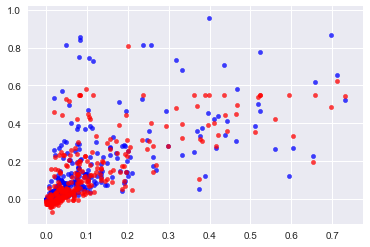

In [146]:
plt.scatter(X2.loc[:, 'Max Drop'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Max Drop'], y2_model[:], alpha=.75, c='red', s=20)

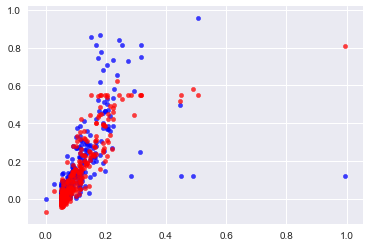

In [147]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)

In [148]:
nn.score(X2, y2)

0.7283849904727879

## Neural net for normalized no flare

In [123]:
nn2 = MLPRegressor(hidden_layer_sizes=(6, 4), max_iter=500, solver='sgd', learning_rate_init=.05, tol=.000001, verbose=True)

In [209]:
sub_columns = demon_.columns
for i in sub_columns:
    demon_norm_noflare[i] = norm(i)
    demon_stand_noflare[i] = stand(i)

In [210]:
X1, X2, y1, y2 = train_test_split(demon_norm_noflare, y_norm_noflare.values.ravel(), train_size=.80)


In [212]:
nn2.fit(X1, y1)

Iteration 1, loss = 0.19241638
Iteration 2, loss = 0.03639271
Iteration 3, loss = 0.01604474
Iteration 4, loss = 0.01291376
Iteration 5, loss = 0.01244556
Iteration 6, loss = 0.01234442
Iteration 7, loss = 0.01208629
Iteration 8, loss = 0.01171346
Iteration 9, loss = 0.01145261
Iteration 10, loss = 0.01118927
Iteration 11, loss = 0.01088316
Iteration 12, loss = 0.01052122
Iteration 13, loss = 0.01012875
Iteration 14, loss = 0.00968553
Iteration 15, loss = 0.00918172
Iteration 16, loss = 0.00858665
Iteration 17, loss = 0.00798989
Iteration 18, loss = 0.00742875
Iteration 19, loss = 0.00698375
Iteration 20, loss = 0.00656652
Iteration 21, loss = 0.00635331
Iteration 22, loss = 0.00612698
Iteration 23, loss = 0.00595182
Iteration 24, loss = 0.00581087
Iteration 25, loss = 0.00565641
Iteration 26, loss = 0.00548978
Iteration 27, loss = 0.00533474
Iteration 28, loss = 0.00516441
Iteration 29, loss = 0.00498607
Iteration 30, loss = 0.00484800
Iteration 31, loss = 0.00478457
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4), learning_rate='constant',
       learning_rate_init=0.05, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [213]:
y2_model = nn2.predict(X2)

(0, 0.5)

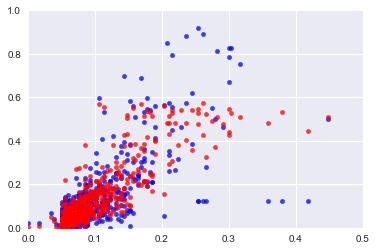

In [214]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)
plt.ylim(0, 1.00)
plt.xlim(0, .5)

(0, 1.0)

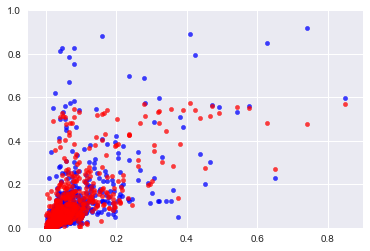

In [215]:
plt.scatter(X2.loc[:, 'Max Drop'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Max Drop'], y2_model[:], alpha=.75, c='red', s=20)
plt.ylim(0, 1.00)

In [216]:
nn2.score(X2, y2)

0.7431044634728634

# NN with both flare and no flare

In [267]:
nn3 = MLPRegressor(hidden_layer_sizes=(6, 4), max_iter=500, solver='sgd', learning_rate_init=.05, tol=.000001, verbose=True)

In [268]:
demon_sub_norm = demon_sub.copy()
sub_columns = demon_sub.columns
for i in sub_columns:
    demon_sub_norm[i] = norm(i)


In [269]:
X1, X2, y1, y2 = train_test_split(demon_sub_norm, y_norm.values.ravel(), train_size=.70)

In [270]:
nn3.fit(X1, y1)

Iteration 1, loss = 0.11939773
Iteration 2, loss = 0.03024511
Iteration 3, loss = 0.01496734
Iteration 4, loss = 0.01336903
Iteration 5, loss = 0.01320706
Iteration 6, loss = 0.01320152
Iteration 7, loss = 0.01319837
Iteration 8, loss = 0.01318194
Iteration 9, loss = 0.01319953
Iteration 10, loss = 0.01317712
Iteration 11, loss = 0.01317844
Iteration 12, loss = 0.01316792
Iteration 13, loss = 0.01316426
Iteration 14, loss = 0.01315889
Iteration 15, loss = 0.01315417
Iteration 16, loss = 0.01314871
Iteration 17, loss = 0.01314090
Iteration 18, loss = 0.01313686
Iteration 19, loss = 0.01315855
Iteration 20, loss = 0.01311982
Iteration 21, loss = 0.01312075
Iteration 22, loss = 0.01311852
Iteration 23, loss = 0.01311028
Iteration 24, loss = 0.01312146
Iteration 25, loss = 0.01312609
Iteration 26, loss = 0.01309082
Iteration 27, loss = 0.01308345
Iteration 28, loss = 0.01307512
Iteration 29, loss = 0.01306484
Iteration 30, loss = 0.01305894
Iteration 31, loss = 0.01304821
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4), learning_rate='constant',
       learning_rate_init=0.05, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [271]:
y2_model = nn3.predict(X2)

(0, 0.5)

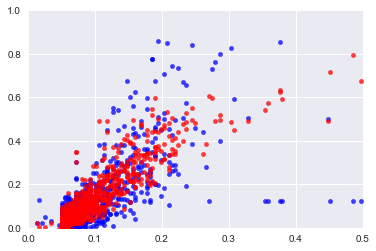

In [272]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)
plt.ylim(0, 1.00)
plt.xlim(0, .5)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


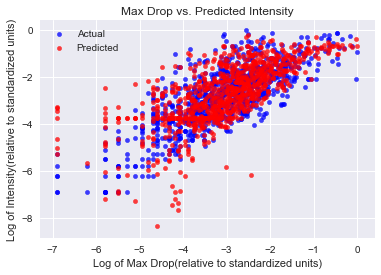

In [280]:
plt.scatter(np.log(X2.loc[:, 'Max Drop']), np.log(y2[:]), alpha=.75, c='blue', s=20, label='Actual')
plt.scatter(np.log(X2.loc[:, 'Max Drop']), np.log(y2_model[:]), alpha=.75, c='red', s=20, label='Predicted')
plt.xlabel('Log of Max Drop(relative to standardized units)');
plt.ylabel('Log of Intensity(relative to standardized units)');
plt.title('Max Drop vs. Predicted Intensity');
plt.legend();
plt.savefig('MaxVsIntensityPredicted.pdf', format='pdf', dpi=1200)

In [274]:
nn3.score(X2, y2)

0.7079952681581542

# Looking back at demon data

(0, 15000)

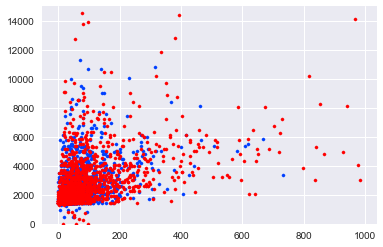

In [116]:
plt.scatter(demon_sub_noflare.loc[:, 'Max Drop'], demon_sub_noflare.loc[:, 'Delta/Dimming Time'], s=10, )
plt.scatter(demon_sub_flare.loc[:, 'Max Drop'], demon_sub_flare.loc[:, 'Delta/Dimming Time'], s=10, c='red')
plt.ylim(0, 15000)

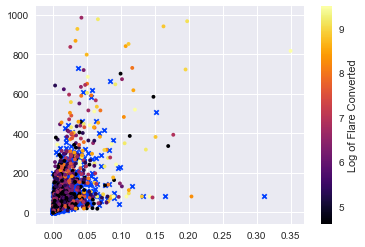

In [175]:
    plt.scatter(demon_sub_noflare.loc[:, 'Total Fraction of Dimming'], demon_sub_noflare.loc[:, 'Max Drop'], s=20, marker='x')
#plt.scatter(demon_sub_flare.loc[:, 'Total Fraction of Dimming'], demon_sub_flare.loc[:, 'Max Drop'], s=15, c='red' )
plt.scatter(demon_sub_flare.loc[:, 'Total Fraction of Dimming'], demon_sub_flare.loc[:, 'Max Drop'], s=15,
            c=np.log(demon_sub_flare.loc[:, 'Flare Converted'].values),  edgecolor='none',
            cmap=plt.cm.get_cmap('inferno', ))
plt.colorbar(label='Log of Flare Converted', ticks=range(12))
plt.clim(4.61, 9.5)
#plt.ylim(0, 15000)

In [185]:
inten_val = demon.loc[:, 'Intensity'].values
small_events_ind = []
for i in range(len(demon)):
    if inten_val[i] < 10:
        small_events_ind.append(i)
        
demon_nosmall_events = demon.drop(small_events_ind)

In [261]:
normed_int = (demon_nosmall_events['Intensity'] - np.min(demon_nosmall_events['Intensity'])) / (np.max(demon_nosmall_events['Intensity']) - np.min(demon_nosmall_events['Intensity']))
normed_max = (demon_nosmall_events['Max Drop'] - np.min(demon_nosmall_events['Max Drop'])) / (np.max(demon_nosmall_events['Max Drop']) - np.min(demon_nosmall_events['Max Drop']))
normed_df = pd.DataFrame(normed_int)
normed_df.insert(1, 'Max Drop', normed_max)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


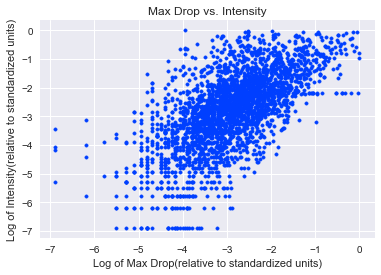

In [266]:
plt.scatter(np.log(normed_df.loc[:, 'Max Drop']),np.log(normed_df.loc[:, 'Intensity']),s=12)
#             c=np.log(demon_nosmall_events.loc[:, 'Flare Converted'].values),  edgecolor='none',
#             cmap=plt.cm.get_cmap('inferno', ), )
# plt.colorbar(label='Log of Flare Converted', ticks=range(12))
# plt.clim(4.61, 9.5)
plt.xlabel('Log of Max Drop(relative to standardized units)');
plt.ylabel('Log of Intensity(relative to standardized units)');
plt.title('Max Drop vs. Intensity');
plt.savefig('MaxVsIntensity.pdf', format='pdf', dpi=1200)

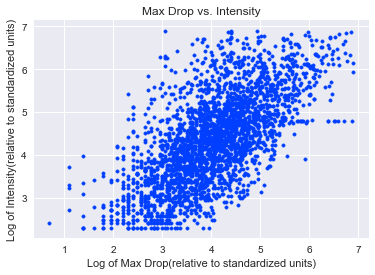

In [207]:
plt.scatter(np.log(demon_nosmall_events.loc[:, 'Max Drop']), np.log(demon_nosmall_events.loc[:, 'Intensity']),s=12)
#             c=np.log(demon_nosmall_events.loc[:, 'Flare Converted'].values),  edgecolor='none',
#             cmap=plt.cm.get_cmap('inferno', ), )
# plt.colorbar(label='Log of Flare Converted', ticks=range(12))
# plt.clim(4.61, 9.5)
plt.xlabel('Log of Max Drop(relative to standardized units)');
plt.ylabel('Log of Intensity(relative to standardized units)');
plt.title('Max Drop vs. Intensity');
plt.savefig('MaxVsIntensity.pdf', format='pdf', dpi=1200)